In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [2]:
!ls

1.png                         HW_6_test_new.csv
2.png                         prophet_predictions_12538.csv
3.png                         prophet_predictions_18969.csv
4.png                         prophet_predictions_31209.csv
5.png                         prophet_predictions_35200.csv
6.png                         prophet_predictions_50628.csv
Answer_1_new.txt              prophet_predictions_70036.csv
Answer_2_test_new.csv         prophet_predictions_71423.csv
HW_6.ipynb                    some.py
HW_6_data_new.csv


In [3]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

In [4]:
sku_data = pd.read_csv('HW_6_data_new.csv')
test_df = pd.read_csv('HW_6_test_new.csv')

In [5]:
sku_data

,dates,SKU,price_per_sku
0,2018-11-05,12538,137.0
1,2018-11-08,12538,137.0
2,2018-11-09,12538,137.0
3,2018-11-10,12538,137.0
4,2018-11-11,12538,137.0
...,...,...,...
1971,2019-10-03,71423,141.0
1972,2019-10-05,71423,141.0
1973,2019-10-10,71423,142.0
1974,2019-10-11,71423,142.0


In [6]:
sku_data.SKU.value_counts()

70036    528
35200    322
12538    320
18969    215
71423    176
50628    156
31209    148
61843     72
48336     39
Name: SKU, dtype: int64

In [15]:
sku_data.dates = pd.to_datetime(sku_data.dates)
test_df.dates = pd.to_datetime(test_df.dates)

In [17]:
pivot_t = sku_data.pivot_table(index='dates',columns='SKU', values='price_per_sku')

In [18]:
pivot_t

SKU,12538,18969,31209,35200,48336,50628,61843,70036,71423
dates,,,,,,,,,
2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
2018-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN
...,...,...,...,...,...,...,...,...,...
2019-12-04,NaN,NaN,168.0,NaN,NaN,NaN,129.0,NaN,NaN
2019-12-05,NaN,NaN,168.0,NaN,NaN,NaN,129.0,NaN,NaN
2019-12-06,NaN,NaN,168.0,NaN,NaN,NaN,129.0,NaN,NaN


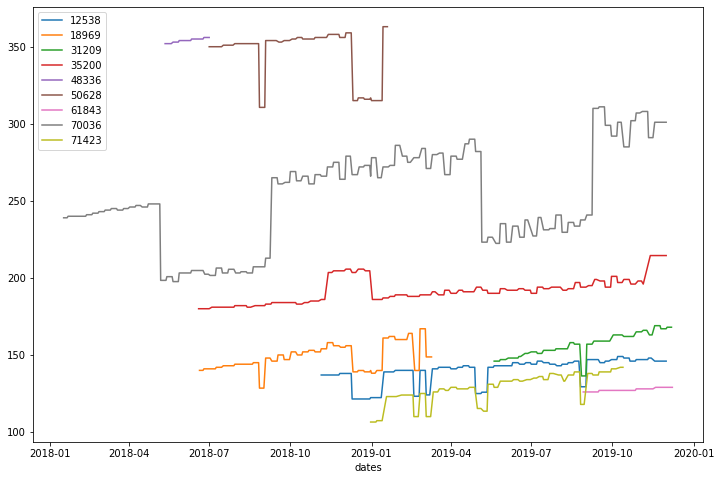

In [19]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pivot_t, dashes=False)

In [7]:
sku_data[sku_data.SKU == 61843].price_per_sku.unique()

array([126., 127., 128., 129.])

In [8]:
sku_data[sku_data.SKU == 48336].price_per_sku.unique()

array([352., 353., 354., 355., 356.])

In [6]:
# import pandas as pd
# import numpy as np
# from fbprophet import Prophet


# sku_data = pd.read_csv('./HW_6_data_new.csv')
# test_df = pd.read_csv('./HW_6_test_new.csv')

# sku_data.dates = pd.to_datetime(sku_data.dates)
# test_df.dates = pd.to_datetime(test_df.dates)

# # prediction_dict = {}
# for sku in sku_data.SKU.unique():
    
#     if sku in (48336, 61843):
#     	continue
#     print('SKU: ',sku)
#     prophet = Prophet()
#     train_data = sku_data[sku_data.SKU ==sku].reset_index(drop=True)
#     train_data.price_per_sku = train_data.price_per_sku.ffill()
#     prophet.fit(train_data[['dates', 'price_per_sku']].rename(columns={'dates':'ds','price_per_sku':'y'}))
#     pred_df = prophet.predict(test_df[test_df.SKU ==sku][['dates']].rename(columns={'dates':'ds'}))
#     pred_df.to_csv('prophet_predictions_{}'.format(sku), index=None)



In [22]:
df = pd.read_csv('./prophet_predictions_35200.csv')

In [23]:
df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-02,208.392166,204.545644,212.394551,208.392166,208.392166,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,0.0,0.0,0.0,208.304614
1,2019-12-09,209.333406,205.074277,213.434486,209.208316,209.480725,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,0.0,0.0,0.0,209.245853
2,2019-12-16,210.274645,206.101496,214.380752,209.731292,210.859751,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,0.0,0.0,0.0,210.187092
3,2019-12-23,211.215884,207.207982,215.660678,210.097036,212.407069,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,-0.087553,0.0,0.0,0.0,211.128331


In [25]:
predictions = pd.DataFrame()
for sku in sku_data.SKU.unique():
    if sku in (48336, 61843):
        continue
    df = pd.read_csv('./prophet_predictions_{}.csv'.format(sku))
    df['SKU'] = sku
    df = df[['ds','SKU', 'yhat_lower', 'yhat_upper']].rename(
        columns={
            'yhat_lower':'predicted_lower_bound'
            ,'yhat_upper':'predicted_upper_bound'
            , 'ds':'dates'
        })
    predictions = pd.concat([df,predictions])

In [26]:
predictions

,dates,SKU,predicted_lower_bound,predicted_upper_bound
0,2019-10-15,71423,133.974242,148.061041
1,2019-10-21,71423,133.418423,147.718725
2,2019-10-28,71423,133.989551,148.642845
3,2019-11-04,71423,134.446206,148.540724
0,2019-12-02,70036,299.345625,332.846594
1,2019-12-09,70036,303.036735,339.838620
2,2019-12-16,70036,306.281398,343.044220
3,2019-12-23,70036,311.398303,347.740434
0,2019-01-23,50628,304.878825,339.466522
1,2019-01-28,50628,300.770808,335.928289


In [27]:
predictions.dates = pd.to_datetime(predictions.dates)

In [28]:
user_answer = test_df.merge(predictions, how='left', on=['SKU', 'dates'])

In [29]:
user_answer

,SKU,dates,predicted_lower_bound,predicted_upper_bound
0,12538,2019-12-02,140.013140,154.537382
1,12538,2019-12-09,139.847857,155.269824
2,12538,2019-12-16,140.665524,155.060795
3,12538,2019-12-26,141.288533,154.870899
4,18969,2019-03-11,152.742966,168.947106
5,18969,2019-03-18,153.479624,170.220810
6,18969,2019-03-25,154.715996,171.918048
7,18969,2019-04-01,156.049447,172.955442
8,31209,2019-12-09,166.038572,175.505704
9,31209,2019-12-17,165.861331,175.049850


In [30]:
user_answer.loc[user_answer.SKU == 48336,'predicted_lower_bound']= sku_data[sku_data.SKU == 48336].price_per_sku.min()
user_answer.loc[user_answer.SKU == 61843,'predicted_lower_bound']= sku_data[sku_data.SKU == 61843].price_per_sku.min()

In [31]:
user_answer.loc[user_answer.SKU == 48336,'predicted_upper_bound']= sku_data[sku_data.SKU == 48336].price_per_sku.max()
user_answer.loc[user_answer.SKU == 61843,'predicted_upper_bound']= sku_data[sku_data.SKU == 61843].price_per_sku.max()

In [32]:
user_answer

,SKU,dates,predicted_lower_bound,predicted_upper_bound
0,12538,2019-12-02,140.013140,154.537382
1,12538,2019-12-09,139.847857,155.269824
2,12538,2019-12-16,140.665524,155.060795
3,12538,2019-12-26,141.288533,154.870899
4,18969,2019-03-11,152.742966,168.947106
5,18969,2019-03-18,153.479624,170.220810
6,18969,2019-03-25,154.715996,171.918048
7,18969,2019-04-01,156.049447,172.955442
8,31209,2019-12-09,166.038572,175.505704
9,31209,2019-12-17,165.861331,175.049850


In [43]:
answers = pd.read_csv('Answer_2_test_new.csv')

In [44]:
answers.head()

,SKU,dates,lower_bound,upper_bound
0,12538,2019-12-02,140.6000,155.4000
1,12538,2019-12-09,123.2528,138.9872
2,12538,2019-12-16,121.1232,139.3568
3,12538,2019-12-26,121.4400,142.5600
4,18969,2019-03-11,158.6500,175.3500


In [45]:
answers.dates = pd.to_datetime(answers.dates)

# METRIC IOU

<img src="1.png" width="600">
<img src="2.png" width="600">
<img src="3.png" width="600">
<img src="4.png" width="600">
<img src="5.png" width="600">
<img src="6.png" width="600">

In [38]:
def calculate_intersection(lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound):
    intersection = 0
    if upper_bound < predicted_lower_bound or lower_bound > predicted_upper_bound :
        intersection = 0
    elif lower_bound <= predicted_lower_bound : 
        if upper_bound <= predicted_upper_bound:
            intersection = upper_bound - predicted_lower_bound
        elif upper_bound > predicted_upper_bound:
            intersection = predicted_upper_bound - predicted_lower_bound
    elif lower_bound > predicted_lower_bound:
        if upper_bound >= predicted_upper_bound:
            intersection = predicted_upper_bound - lower_bound
        elif upper_bound < predicted_upper_bound:
            intersection = upper_bound - lower_bound
    return intersection

In [39]:
def calculate_union(lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound):
    min_ = np.min([lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound])
    max_ = np.max([lower_bound, upper_bound, predicted_lower_bound, predicted_upper_bound])
    return max_ - min_

In [46]:
answers = answers.merge(user_answer, how='left', on=['SKU', 'dates'])

In [41]:
answers

,SKU,dates,lower_bound,upper_bound,predicted_lower_bound_x,predicted_upper_bound_x,predicted_lower_bound_y,predicted_upper_bound_y
0,12538,2019-12-02,140.6000,155.4000,140.013140,154.537382,140.013140,154.537382
1,12538,2019-12-09,123.2528,138.9872,139.847857,155.269824,139.847857,155.269824
2,12538,2019-12-16,121.1232,139.3568,140.665524,155.060795,140.665524,155.060795
3,12538,2019-12-26,121.4400,142.5600,141.288533,154.870899,141.288533,154.870899
4,18969,2019-03-11,158.6500,175.3500,152.742966,168.947106,152.742966,168.947106
5,18969,2019-03-18,151.3400,170.6600,153.479624,170.220810,153.479624,170.220810
6,18969,2019-03-25,146.9400,169.0600,154.715996,171.918048,154.715996,171.918048
7,18969,2019-04-01,153.6400,180.3600,156.049447,172.955442,156.049447,172.955442
8,31209,2019-12-09,137.9400,152.4600,166.038572,175.505704,166.038572,175.505704
9,31209,2019-12-17,143.1056,161.3744,165.861331,175.049850,165.861331,175.049850


In [47]:
answers['intersection'] = answers.apply(lambda x: calculate_intersection(x.lower_bound, x.upper_bound
                                               , x.predicted_lower_bound, x.predicted_upper_bound), axis=1)
answers['union'] = answers.apply(lambda x: calculate_union(x.lower_bound, x.upper_bound
                                               , x.predicted_lower_bound, x.predicted_upper_bound), axis=1)

answers['iou'] = answers.intersection / answers.union

In [48]:
answers.iou.mean()

0.30748880444009863

In [49]:
answers[['dates', 'SKU', 'intersection', 'union','iou']]

,dates,SKU,intersection,union,iou
0,2019-12-02,12538,13.937382,15.386860,0.905798
1,2019-12-09,12538,0.000000,32.017024,0.000000
2,2019-12-16,12538,0.000000,33.937595,0.000000
3,2019-12-26,12538,1.271467,33.430899,0.038033
4,2019-03-11,18969,10.297106,22.607034,0.455482
5,2019-03-18,18969,16.741185,19.320000,0.866521
6,2019-03-25,18969,14.344004,24.978048,0.574264
7,2019-04-01,18969,16.905995,26.720000,0.632709
8,2019-12-09,31209,0.000000,37.565704,0.000000
9,2019-12-17,31209,0.000000,31.944250,0.000000
